**Employee Attrition Submission**

Firstly thanking Consulting and Analytics Club IITG for organising the Summer Analytics Course and this Kaggle competition. This being my first completely attempted Kaggle competition was really insightful and tought me a lot. I have tried to explain my notebook at my best and tried to keep the code simple and clear. I am open to any suggestions you have and would love to learn from you.

**Importing files**

Adding the input data for the comeptetition and importing the most neccesary libraries.

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/summeranalytics2020/train.csv
/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv


**Loading Data**

Note: Your current directory always remains "/kaggle/working" and can be checked by using !pwd command, and so the paths to input files are written accordingly.

In [2]:
train_data = pd.read_csv("../input/summeranalytics2020/train.csv",index_col= "Id")
test_data = pd.read_csv("../input/summeranalytics2020/test.csv",index_col= "Id")

X = train_data.drop(['Attrition'],axis='columns').copy()
y = train_data["Attrition"].copy()
X_test = test_data.copy()

In [3]:
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,...,3,0,12,2,11,7,6,7,4,1
2,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,...,3,2,7,2,3,2,1,1,2,1
3,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,...,3,0,12,3,9,7,7,3,5,1
4,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,...,3,0,18,2,7,7,1,7,4,1
5,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,...,3,1,10,2,10,7,7,8,1,1


**Spliting the data to create validation set**

Test size is suggested to be between 0.2-0.3 .

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=0)

**Checking for redundant columns**

In [5]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical columns:")
print(object_cols)

# Get list of numerical variables
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

print("\nNumerical columns:")
print((numerical_cols))

Categorical columns:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

Numerical columns:
['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill', 'Behaviour']


In [6]:
X_train.nunique()

Age                         43
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EmployeeNumber             758
EnvironmentSatisfaction      4
Gender                       2
JobInvolvement               4
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
MonthlyIncome              725
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
StockOptionLevel             4
TotalWorkingYears           39
TrainingTimesLastYear        7
YearsAtCompany              34
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        17
CommunicationSkill           5
Behaviour                    1
dtype: int64

Hence it is obvious that "Behaviour" is redundant column and so removing it. The copy warnings can be ignored.

In [7]:
X_train.drop(['Behaviour'],inplace=True,axis='columns')
X_valid.drop(['Behaviour'],inplace=True,axis='columns')
X_test.drop(['Behaviour'],inplace=True,axis='columns')

numerical_cols.remove("Behaviour")
print("Numerical Columns:")
print(numerical_cols)

Numerical Columns:
['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill']


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Visualization of Data**

Since there were no missing values in the data now checking for the skewness of the data to apply appropriate transformations. 

First column-No transformations, Second column-Sqrt Transformation, Third column-Log Transformation 

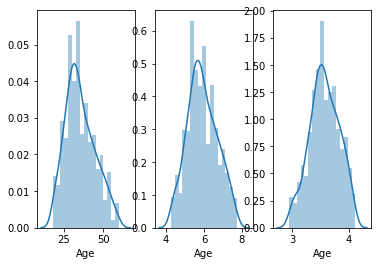

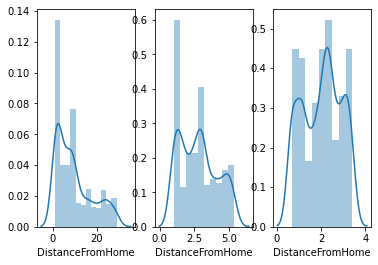

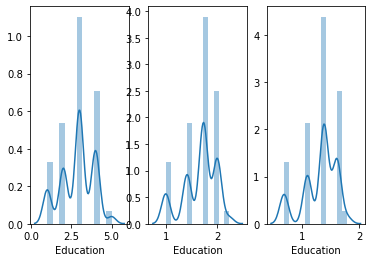

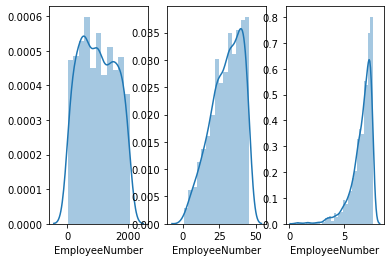

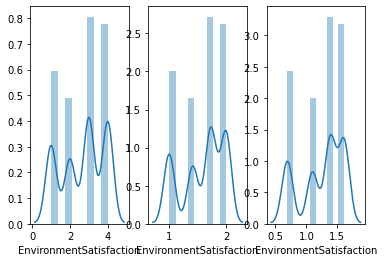

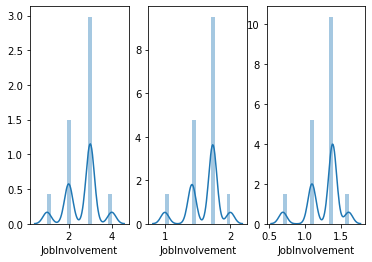

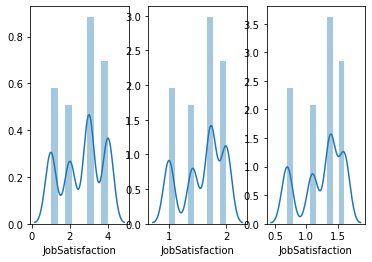

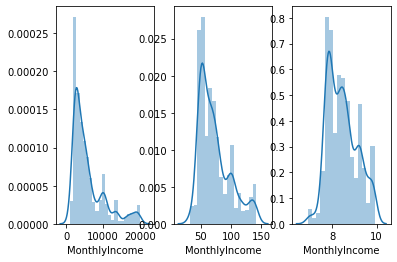

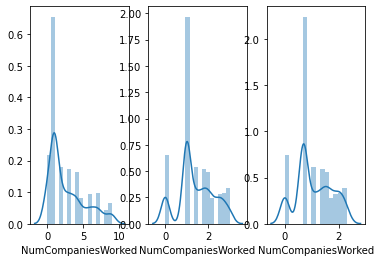

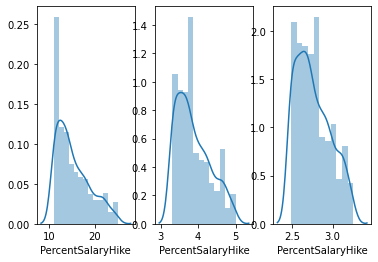

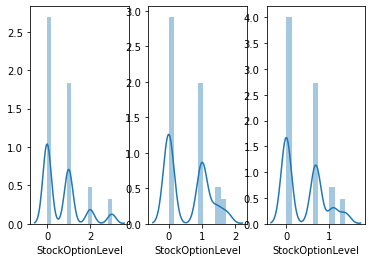

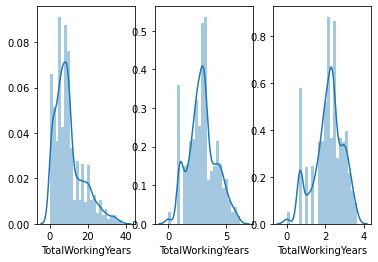

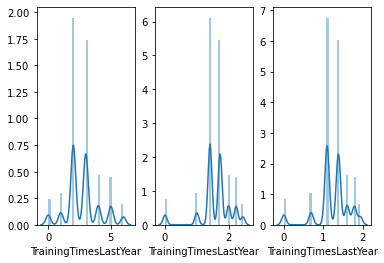

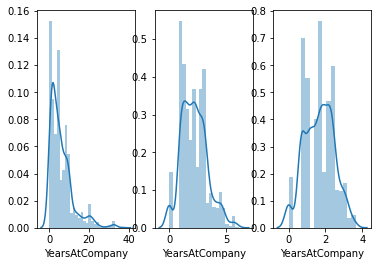

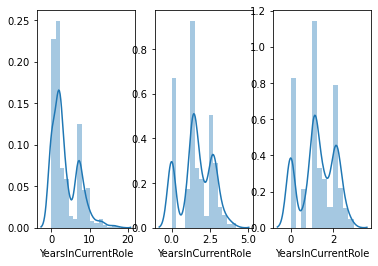

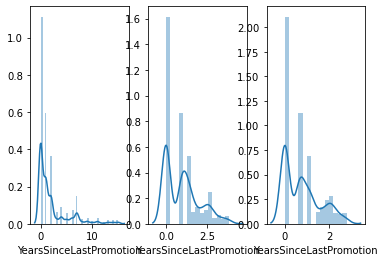

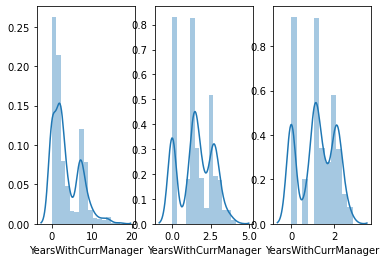

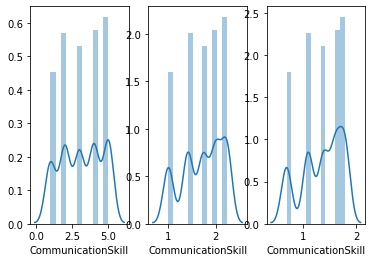

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

#all numerical columns except performance rating because there was some error in producing it graph

cols = ['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill']

for col in cols:
    fig,ax = plt.subplots(1,3)
    sns.distplot(X_train[col],ax=ax[0])
    sns.distplot(np.sqrt(X_train[col]),ax=ax[1])
    sns.distplot(np.log(X_train[col]+1),ax=ax[2])

Depending upon the skewness of the data and a few iterations a found that the following transformations are best suited.

Square root transformation for ['DistanceFromHome','TotalWorkingYears','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

Log transformation for ['MonthlyIncome','PercentSalaryHike']

In [9]:
sqrt_col = ['DistanceFromHome','TotalWorkingYears','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
log_col = ['MonthlyIncome','PercentSalaryHike']

X_train[sqrt_col] = np.sqrt(X_train[sqrt_col])
X_train[log_col] = np.log(np.log(X_train[log_col]))

X_valid[sqrt_col] = np.sqrt(X_valid[sqrt_col])
X_valid[log_col] = np.log(np.log(X_valid[log_col]))

X_test[sqrt_col] = np.sqrt(X_test[sqrt_col])
X_test[log_col] = np.log(np.log(X_test[log_col]))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Checking distribution of both the train(1st column) and test(2nd column) data and found them almost same.

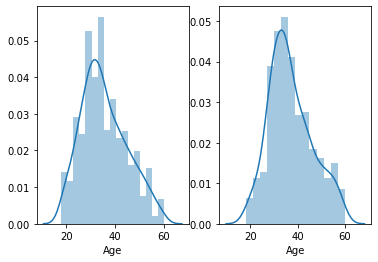

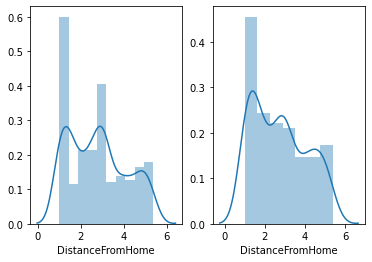

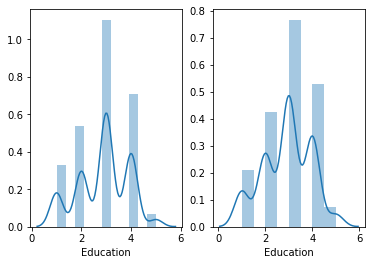

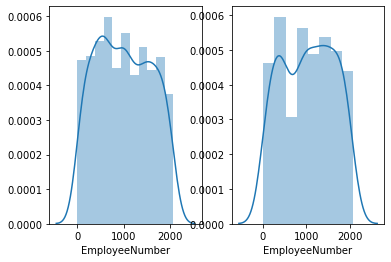

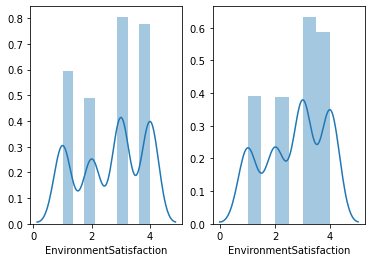

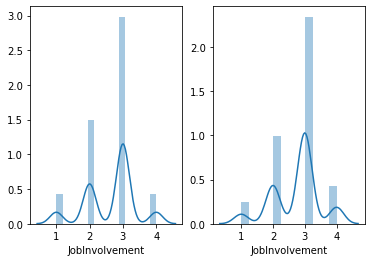

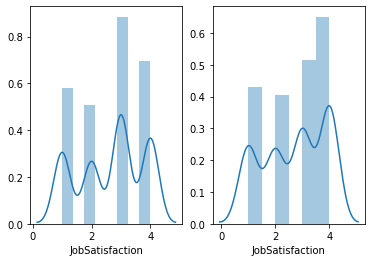

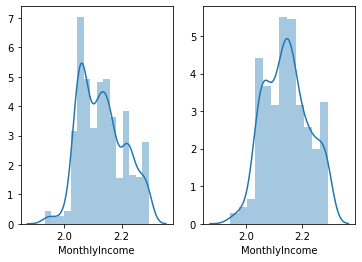

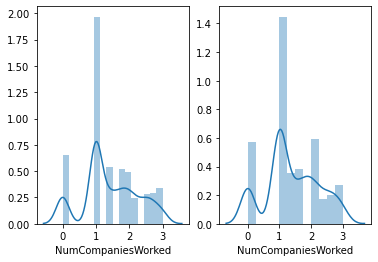

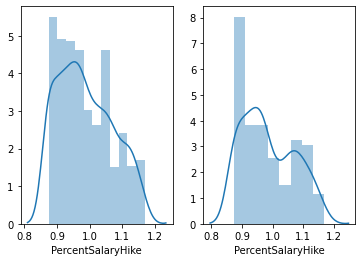

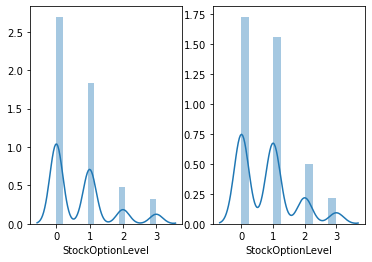

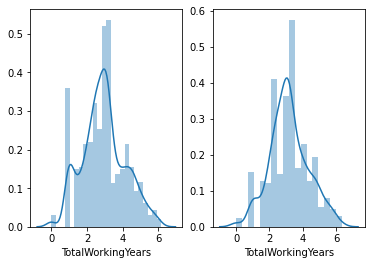

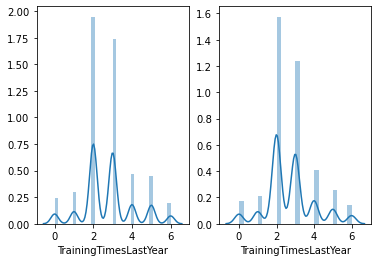

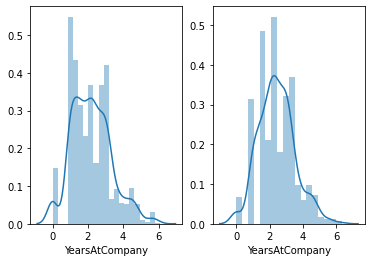

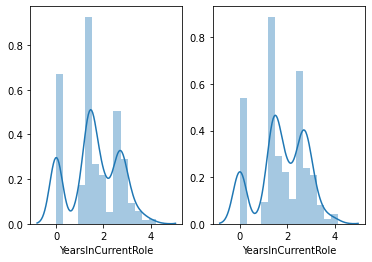

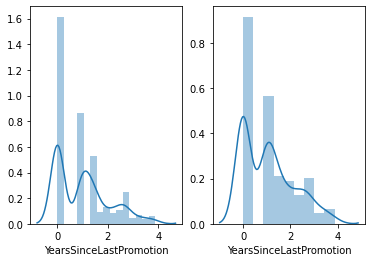

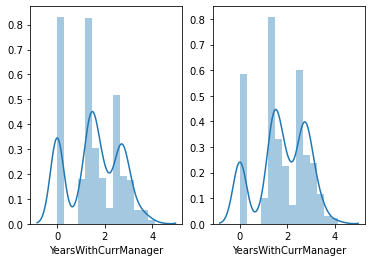

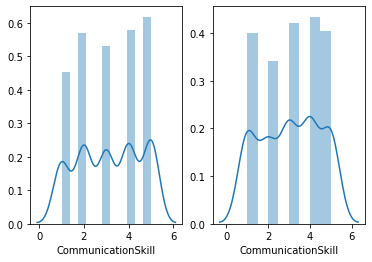

In [10]:
cols = ['Age', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill']

for col in cols:
    fig,ax = plt.subplots(1,2)
    sns.distplot(X_train[col],ax=ax[0])
    sns.distplot(X_test[col],ax=ax[1])

**Defining models and Data preprocessing**

To make the data clean and clear Pipeline is used.
Multiple models are defined with multiple grids appropriately and GridSearchCV is used for hyperparameter tuning.
After testing multiple models, LogisticRegression seem to fit great so used it as final model.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.calibration import CalibratedClassifierCV

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False)),
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, object_cols),
    ])

model1 = LogisticRegression(random_state=0)
lrm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model1)
])
grid_val1 = [
    {'model__penalty':['l2'],'model__tol':[0.001],'model__C':[1],'model__solver':['liblinear','saga','newton-cg','lbfgs'],'model__max_iter':[100]},
    {'model__penalty':['l1'],'model__tol':[0.001],'model__C':[1],'model__solver':['liblinear','saga'],'model__max_iter':[100]},
    {'model__penalty':['elasticnet'],'model__tol':[0.001],'model__C':[0.1],'model__solver':['saga'],'model__max_iter':[100],'model__l1_ratio':[0.25,0.5,0.75]},
]

'''
model2 = DecisionTreeClassifier(random_state=0)
dtm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model2)
])
grid_val2 = [
    {'model__criterion':['gini','entropy'],'model__max_depth':[10],'model__max_features':['sqrt','log2','none']}
]

model3 = RandomForestClassifier(random_state=0)
rfcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model3)
])
grid_val3 = [
    {'model__criterion':['gini'],'model__max_depth':[6],'model__n_estimators':[20]}
]

model4 = SVC(random_state=0,probability=True)
svcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model4)
])
grid_val4 = [
    {'model__C':[0.1],'model__kernel':['poly'],'model__degree':[2],'model__gamma':[0.1],'model__tol':[0.01]}
]

model5 = XGBClassifier(random_state=0)
xgbcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model5)
])
grid_val5 = [
    {'model__max_depth':[5],'model__objective':['binary:logistic'],'model__eval_metric':['auc'],'model__booster':['gblinear'],'model__learning_rate':[0.2]}
]

model6 = GaussianNB()
nbcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model6)
])
grid_val6 = [
    {'model__var_smoothing':[1e-09,1e-10,1e-08]}
]

model7 = CalibratedClassifierCV(LinearSVC(max_iter=1000000,random_state=0,loss='hinge'))
lsvcm = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model7)
])
grid_val7 =[
    {'model__method':['sigmoid']}
]
'''

fm = GridSearchCV(lrm,param_grid = grid_val1,scoring = 'roc_auc')

fm.fit(X_train,y_train)

print(fm.best_params_)

y_valid_pred = fm.predict_proba(X_valid)[:,1]
y_train_pred = fm.predict_proba(X_train)[:,1]

print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_valid,y_valid_pred))

y_test_pred = fm.predict_proba(X_test)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'model__C': 1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'newton-cg', 'model__tol': 0.001}
0.8945415955050617
0.8595548862115127


**Creating the output file**

In [12]:
output = pd.DataFrame({'Id': X_test.index,
                       'Attrition': y_test_pred})
output.to_csv('submission.csv',index=False)

In [13]:
#Checking if the output is in the desired format

output.head()

,Id,Attrition
0,1,0.058112
1,2,0.086513
2,3,0.389182
3,4,0.110070
4,5,0.006939
